In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np

from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, auc, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib.patches import Shadow
from matplotlib.lines import Line2D

# Set matplotlib style 
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'axes.titlesize' : 25,
    'axes.labelsize' : 19,
    'legend.fontsize' : 18,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300.0,
})

mpl.rcParams['axes.unicode_minus'] = False
sns.set(font_scale=1.5, style="white", 
        rc={
            'font.family': 'sans-serif',
            'axes.titlesize' : 25,
            'axes.labelsize' : 22,
            'legend.fontsize' : 15,
            'xtick.labelsize' : 17,
            'ytick.labelsize' : 17,
            'xtick.bottom': True,
            'ytick.left': True,
            'figure.dpi': 300.0,
})
%matplotlib inline

# 1. Random split

In [2]:
df_1 = pd.read_csv('../results/random_split_fp_descriptors_test_size_0.2')
df_2 = pd.read_csv('../results/random_split_dft_descriptors_test_size_0.2')
df_3 = pd.read_csv('../results/random_split_rxnfp_descriptors_test_size_0.2_full')
df_4 = pd.read_csv('../results/random_split_drfp_descriptors_test_size_0.2')
df_2.columns = df_1.columns

In [3]:
def get_mean_std_r2(dataframe, n_iterations=10):
    length = int(len(dataframe)/n_iterations)
    r2_splits = []
    # get r2 for each split
    for i in range(n_iterations):
        r2_splits.append(r2_score(dataframe["Yields"][i*length:(i+1)*length], dataframe["Predicted Yields"][i*length:(i+1)*length]))
    # returns mean and std 
    return np.mean(r2_splits), np.std(r2_splits)

def get_mean_std_mae(dataframe, n_iterations=10):
    length = int(len(dataframe)/n_iterations)
    mae_splits = []
    # get r2 for each split
    for i in range(n_iterations):
        mae_splits.append(mean_absolute_error(dataframe["Yields"][i*length:(i+1)*length], dataframe["Predicted Yields"][i*length:(i+1)*length]))
    # returns mean and std 
    return np.mean(mae_splits), np.std(mae_splits)

def get_mean_std_rmse(dataframe, n_iterations=10):
    length = int(len(dataframe)/n_iterations)
    rmse_splits = []
    # get r2 for each split
    for i in range(n_iterations):
        rmse_splits.append(mean_squared_error(dataframe["Yields"][i*length:(i+1)*length], dataframe["Predicted Yields"][i*length:(i+1)*length])**0.5)
    # returns mean and std 
    return np.mean(rmse_splits), np.std(rmse_splits)

def get_metrics(dataframe):
    """Unlike previous functions, returns results stratified by DOI/coupling partner"""
    origins = np.unique(dataframe['Substrate'])
    R2_scores = []
    MAE_scores = []
    RMSE_scores = []
    for origin in origins:
        y_true = dataframe[dataframe['Substrate'] == origin]["Yields"]
        y_pred = dataframe[dataframe['Substrate'] == origin]["Predicted Yields"]
        R2_scores.append(round(r2_score(y_true, y_pred), 2))
        MAE_scores.append(round(mean_absolute_error(y_true, y_pred), 2))
        RMSE_scores.append(round(mean_squared_error(y_true, y_pred)**0.5, 2))
    return origins, R2_scores, MAE_scores, RMSE_scores

## FP descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


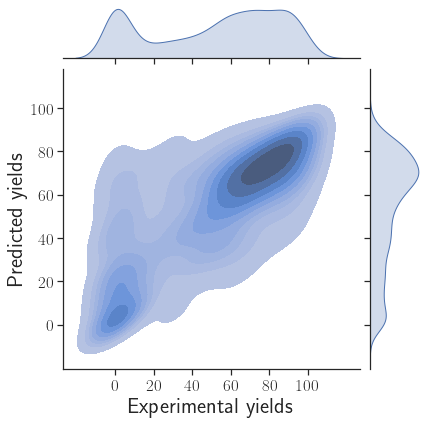

In [4]:
h = sns.jointplot("Yields", "Predicted Yields", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
#h.ax_marg_x.set_facecolor("white")
#h.ax_marg_y.set_facecolor("white")

fig_path = '../images/random_split_fp_descriptors_test_size_0.2_full.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

## DFT descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

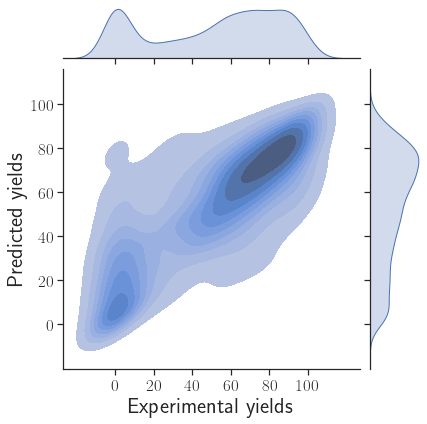

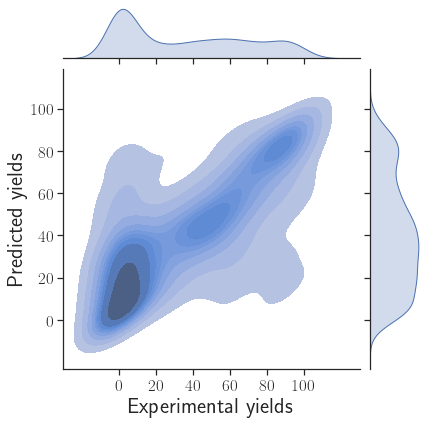

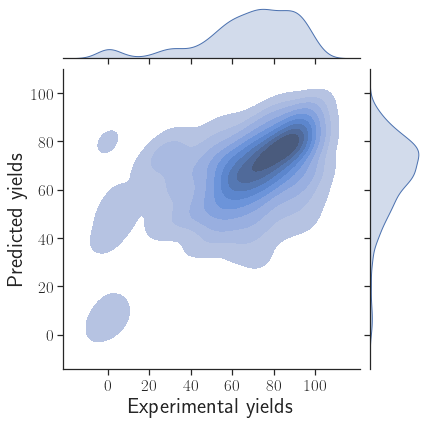

In [5]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Predicted Yields", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")

plt.savefig('../images/random_split_dft_descriptors_test_size_0.2_full.png', dpi=300)
fig_paths.append('../images/random_split_dft_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))


indices = np.where(df_2['Origin'] == "Optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]

h = sns.jointplot("Yields", "Predicted Yields", df_2_optimisation, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('../images/random_split_dft_descriptors_test_size_0.2_optimisation.png', dpi=300)
fig_paths.append('../images/random_split_dft_descriptors_test_size_0.2_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))

indices = np.where(df_2['Origin'] == "Scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]
h = sns.jointplot("Yields", "Predicted Yields", df_2_scope, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('../images/random_split_dft_descriptors_test_size_0.2_scope.png', dpi=300)
fig_paths.append('../images/random_split_dft_descriptors_test_size_0.2_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))

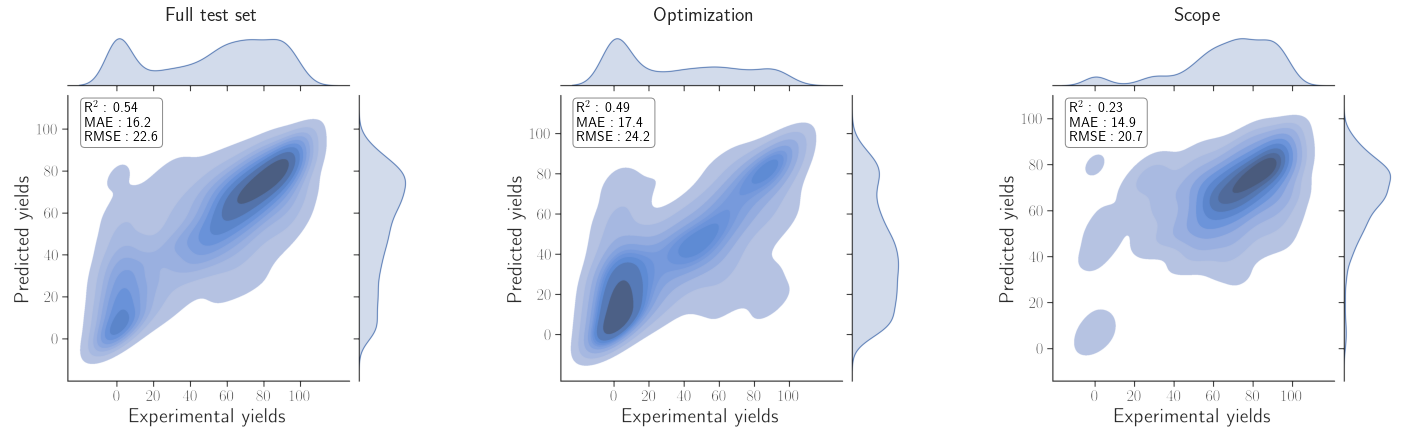

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]

origins = ["Full test set", "Optimization", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(340, 500, ' R$^2$      : {:.2f} \n MAE   : {:.1f} \n RMSE : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k" ))

plt.savefig("../images/random_split_dft_descriptors_test_size_0.2_scope_opt_full.svg", bbox_inches='tight')

## RXNFP descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


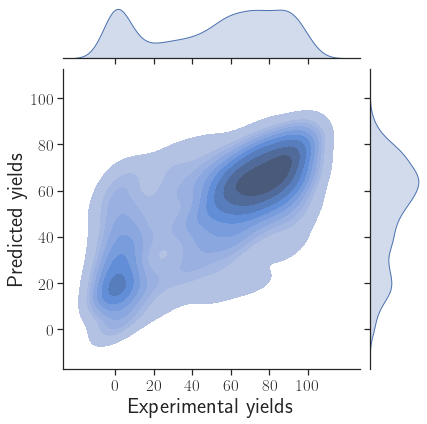

In [7]:
h = sns.jointplot("Yields", "Predicted Yields", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")

plt.savefig('../images/random_split_rxnfp_descriptors_test_size_0.2_full.png', dpi=300, bbox_inches='tight')

## Comparison of all descriptors performances

In [8]:
fig_paths = []
rmse = []
mae = []
r2 = []
r2_means = []
r2_stds = []
mae_means = []
mae_stds = []
rmse_means = []
rmse_stds = []

fig_paths.append('../images/random_split_fp_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Predicted Yields"]))
r2.append(r2_score(df_1["Yields"], df_1["Predicted Yields"]))
r2_mean, r2_std = get_mean_std_r2(df_1)
r2_means.append(r2_mean)
r2_stds.append(r2_std)
mae_mean, mae_std = get_mean_std_mae(df_1)
mae_means.append(mae_mean)
mae_stds.append(mae_std)
rmse_mean, rmse_std = get_mean_std_rmse(df_1)
rmse_means.append(rmse_mean)
rmse_stds.append(rmse_std)

fig_paths.append('../images/random_split_dft_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))
r2_mean, r2_std = get_mean_std_r2(df_2)
r2_means.append(r2_mean)
r2_stds.append(r2_std)
mae_mean, mae_std = get_mean_std_mae(df_2)
mae_means.append(mae_mean)
mae_stds.append(mae_std)
rmse_mean, rmse_std = get_mean_std_rmse(df_2)
rmse_means.append(rmse_mean)
rmse_stds.append(rmse_std)

fig_paths.append('../images/random_split_rxnfp_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Predicted Yields"]))
r2.append(r2_score(df_3["Yields"], df_3["Predicted Yields"]))
r2_mean, r2_std = get_mean_std_r2(df_3)
r2_means.append(r2_mean)
r2_stds.append(r2_std)
mae_mean, mae_std = get_mean_std_mae(df_3)
mae_means.append(mae_mean)
mae_stds.append(mae_std)
rmse_mean, rmse_std = get_mean_std_rmse(df_3)
rmse_means.append(rmse_mean)
rmse_stds.append(rmse_std)


r2_mean, r2_std = get_mean_std_r2(df_4)
print(r2_mean)
print(r2_std)

mae_mean, mae_std = get_mean_std_mae(df_4)
print(mae_mean)
print(mae_std)

rmse_mean, rmse_std = get_mean_std_rmse(df_4)
print(rmse_mean)
print(rmse_std)

0.5047694565268732
0.039491066470341694
17.070834419891526
0.6365779582371061
23.484623910187484
0.843300969170258


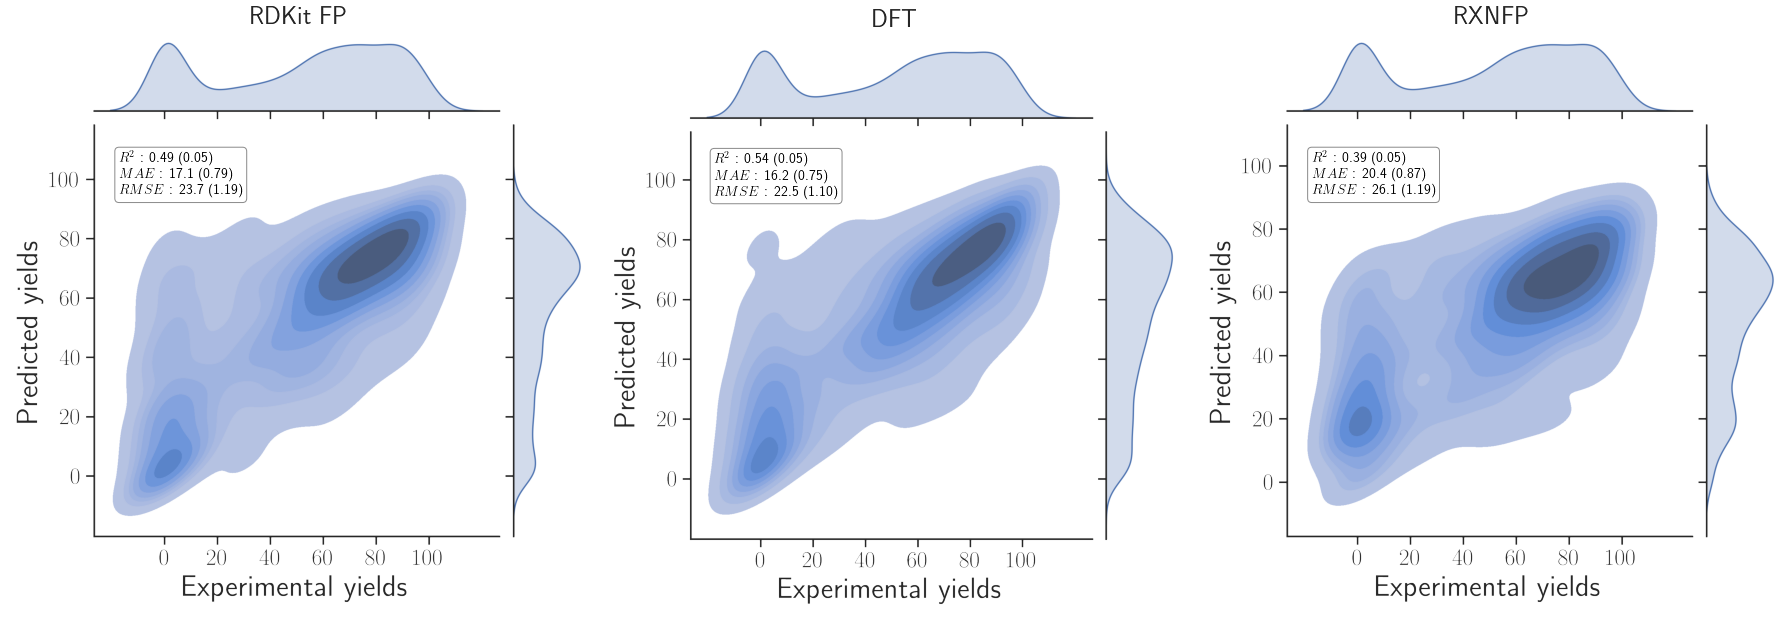

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()    
    text = ax.text(340, 500, ' $R^2$      : {:.2f} ({:.2f}) \n $MAE$   : {:.1f} ({:.2f}) \n $RMSE$ : {:.1f} ({:.2f})'.format(r2_means[i], r2_stds[i],
                                                                                                           mae_means[i], mae_stds[i],
                                                                                                           rmse_means[i],  rmse_stds[i]), color='black', 
                   size=14,  
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))
fig.tight_layout()    
plt.savefig('../images/random_split_all_descriptors_test_size_0.2_full_std.png', dpi=300, bbox_inches='tight')

In [10]:
df_1 = pd.read_csv('../results/random_split_dft_descriptors_scope_test_size_0.2')
df_2 = pd.read_csv('../results/random_split_dft_descriptors_optimisation_test_size_0.2')
df_2.columns = df_1.columns

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


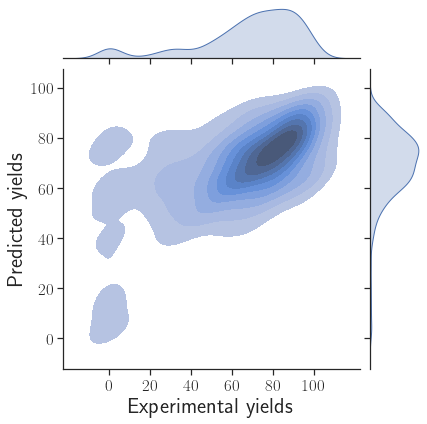

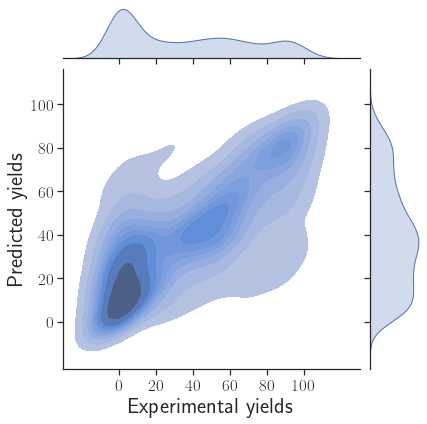

In [11]:
h = sns.jointplot("Yields", "Predicted Yields", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")

plt.savefig('../images/random_split_dft_descriptors_scope_only.png', dpi=300, bbox_inches='tight')

h = sns.jointplot("Yields", "Predicted Yields", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")

plt.savefig('../images/random_split_dft_descriptors_optimization_only.png', dpi=300, bbox_inches='tight')

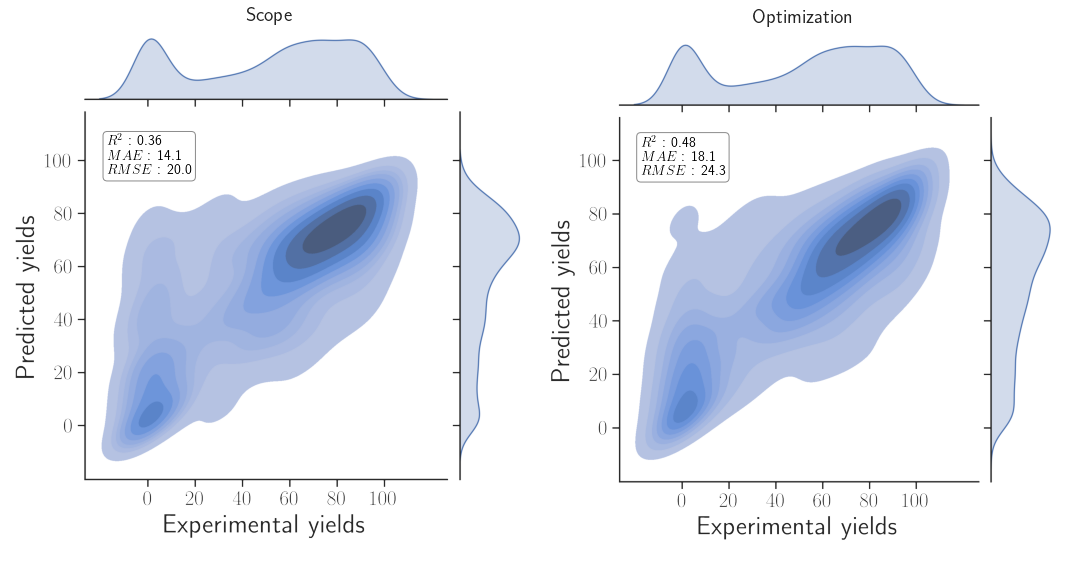

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15), sharey=True)

origins = ["Scope", "Optimization",]
dfs = [df_1, df_2]
rmse = []
mae = []
r2 = []

rmse.append(mean_squared_error(df_1["Yields"], df_1["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Predicted Yields"]))
r2.append(r2_score(df_1["Yields"], df_1["Predicted Yields"]))
fig_paths.append('../images/random_split_dft_descriptors_scope_only.png')

rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))
fig_paths.append('../images/random_split_dft_descriptors_optimization_only.png')

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()  
    text = ax.text(340, 500, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', 
                   size=14,  
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))
fig.tight_layout()  
plt.savefig('../images/random_split_dft_descriptors_optimisation_scope_test_size_0.2.png', dpi=300, bbox_inches='tight')

## DFT descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

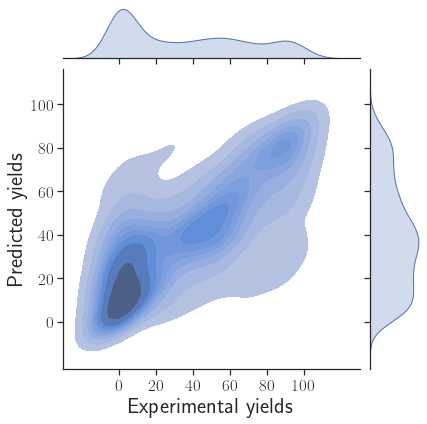

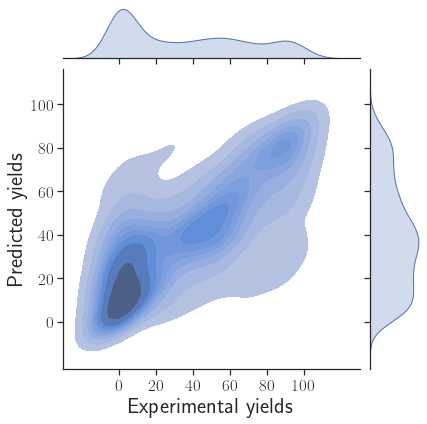

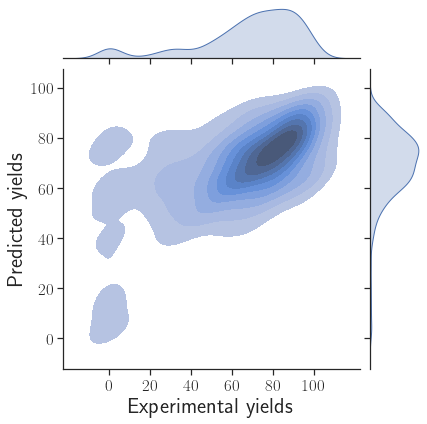

In [13]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Predicted Yields", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")

plt.savefig('../images/random_split_dft_descriptors_test_size_0.2_full.png', dpi=300)
fig_paths.append('../images/random_split_dft_descriptors_test_size_0.2_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))


indices = np.where(df_2['Origin'] == "Optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]

h = sns.jointplot("Yields", "Predicted Yields", df_2_optimisation, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('../images/random_split_dft_descriptors_test_size_0.2_optimisation.png', dpi=300)
fig_paths.append('../images/random_split_dft_descriptors_test_size_0.2_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))

indices = np.where(df_1['Origin'] == "Scope")
df_1_scope = df_1[["Yields", "Predicted Yields"]].iloc[indices]
h = sns.jointplot("Yields", "Predicted Yields", df_1_scope, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('../images/random_split_dft_descriptors_test_size_0.2_scope.png', dpi=300)
fig_paths.append('../images/random_split_dft_descriptors_test_size_0.2_scope.png')
rmse.append(mean_squared_error(df_1_scope["Yields"], df_1_scope["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_1_scope["Yields"], df_1_scope["Predicted Yields"]))
r2.append(r2_score(df_1_scope["Yields"], df_1_scope["Predicted Yields"]))

# 2. Substrate split

In [14]:
df_1 = pd.read_csv('../results/substrate_split_fp_descriptors')
df_2 = pd.read_csv('../results/substrate_split_dft_descriptors')
df_3 = pd.read_csv('../results/substrate_split_rxnfp_descriptors')
df_2.columns = df_1.columns

## FP descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


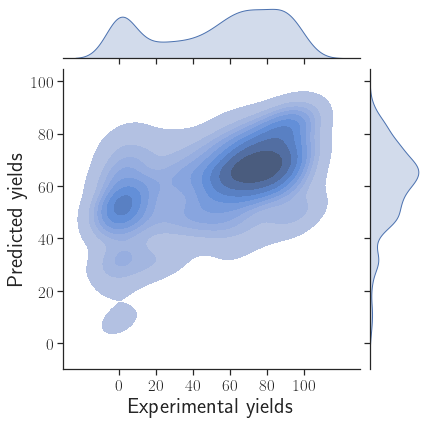

In [15]:
h = sns.jointplot("Yields", "Predicted Yields", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
x_low, x_up = h.ax_joint.get_xlim()
y_low, y_up = h.ax_joint.get_ylim()

plt.savefig('../images/substrate_split_fp_descriptors_full.png', dpi=300, bbox_inches='tight')

## DFT descriptors 

### Comparison of full dataset and scope/optimisation subsets

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

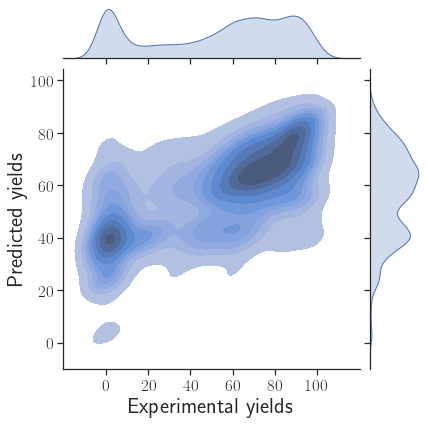

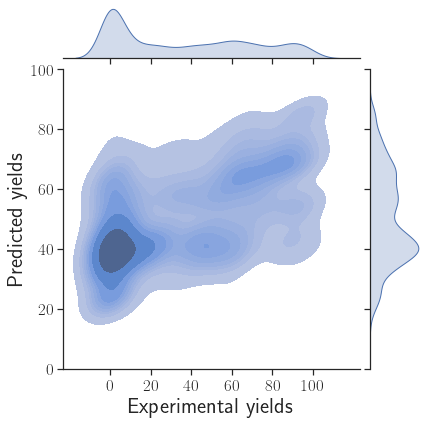

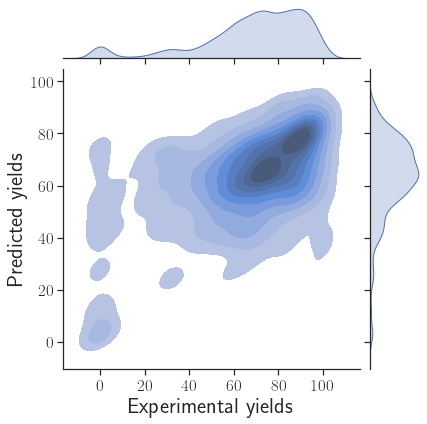

In [16]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Predicted Yields", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('../images/substrate_split_dft_descriptors_full.png', dpi=300)
fig_paths.append('../images/substrate_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))


indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]
h = sns.jointplot("Yields", "Predicted Yields", df_2_optimisation, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('../images/substrate_split_dft_descriptors_optimisation.png', dpi=300)
fig_paths.append('../images/substrate_split_dft_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]
h = sns.jointplot("Yields", "Predicted Yields", df_2_scope, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('../images/substrate_split_dft_descriptors_scope.png', dpi=300)
fig_paths.append('../images/substrate_split_dft_descriptors_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))

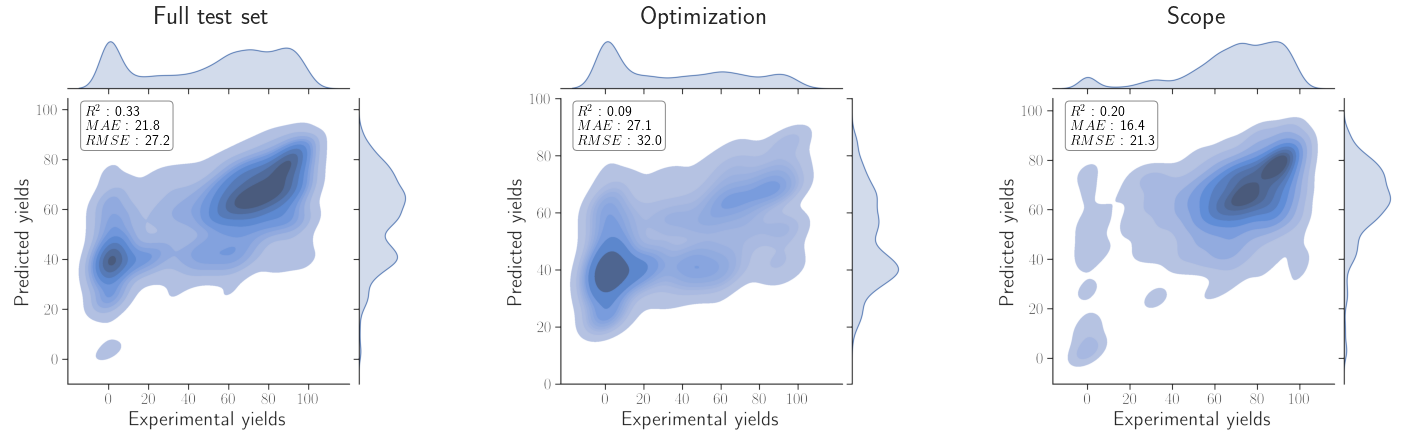

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "Optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]

indices = np.where(df_2['Origin'] == "Scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]

origins = ["Full test set", "Optimization", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    ax.text(340, 500, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14,  
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

### Classification task

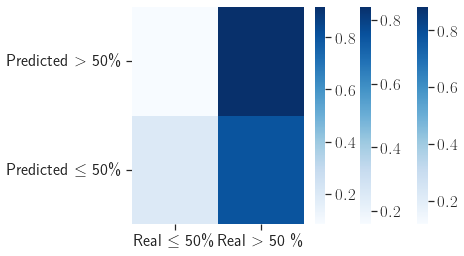

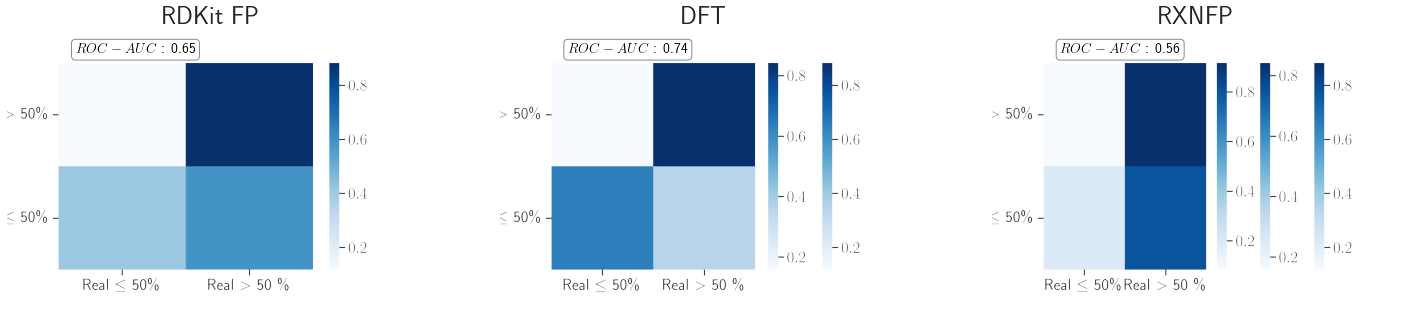

In [18]:
rocauc = []
fig_paths = []

predictions = df_1["Predicted Yields"]>50
cm = confusion_matrix(1 * df_1["Yields"]>50, predictions, normalize="true")
cm_new = [cm[1], cm[0]]
fpr, tpr, thresholds = metrics.roc_curve(1 * df_1["Yields"]>50, predictions)
df = pd.DataFrame(data=cm_new, columns=["Real $\leq$ 50\%", "Real $>$ 50 \%"], index=["Predicted $>$ 50\%", "Predicted $\leq$ 50\%"])
sns.heatmap(df, cmap="Blues")
plt.xticks(rotation=0) 
plt.yticks(rotation=0) 
plt.savefig('../images/substrate_split_fp_descriptors_full_classification.png', dpi=300)
fig_paths.append('../images/substrate_split_fp_descriptors_full_classification.png')
rocauc.append(metrics.auc(fpr, tpr))


predictions = df_2["Predicted Yields"]>50
cm = confusion_matrix(1 * df_2["Yields"]>50, predictions, normalize="true")
cm_new = [cm[1], cm[0]]
fpr, tpr, thresholds = metrics.roc_curve(1 * df_2["Yields"]>50, predictions)
df = pd.DataFrame(data=cm_new, columns=["Real $\leq$ 50\%", "Real $>$ 50 \%"], index=["Predicted $>$ 50\%", "Predicted $\leq$ 50\%"])
sns.heatmap(df, cmap="Blues")
plt.xticks(rotation=0) 
plt.yticks(rotation=0) 
plt.savefig('../images/substrate_split_dft_descriptors_full_classification.png', dpi=300)
fig_paths.append('../images/substrate_split_dft_descriptors_full_classification.png')
rocauc.append(metrics.auc(fpr, tpr))

predictions = df_3["Predicted Yields"]>50
cm = confusion_matrix(1 * df_3["Yields"]>50, predictions, normalize="true")
cm_new = [cm[1], cm[0]]
fpr, tpr, thresholds = metrics.roc_curve(1 * df_3["Yields"]>50, predictions)
df = pd.DataFrame(data=cm_new, columns=["Real $\leq$ 50\%", "Real $>$ 50 \%"], index=["Predicted $>$ 50\%", "Predicted $\leq$ 50\%"])
sns.heatmap(df, cmap="Blues")
plt.xticks(rotation=0) 
plt.yticks(rotation=0) 
plt.savefig('../images/substrate_split_rxnfp_descriptors_full_classification.png', dpi=300)
fig_paths.append('../images/substrate_split_rxnfp_descriptors_full_classification.png')
rocauc.append(metrics.auc(fpr, tpr))


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)
origins = ["RDKit FP", "DFT", "RXNFP",]
for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    text = ax.text(300, 100, ' $ROC-AUC$      : {:.2f}'.format(rocauc[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))
    
plt.savefig('../images/substrate_split_all_descriptors_full_classification.png', dpi=300, bbox_inches='tight')

## RXNFP descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


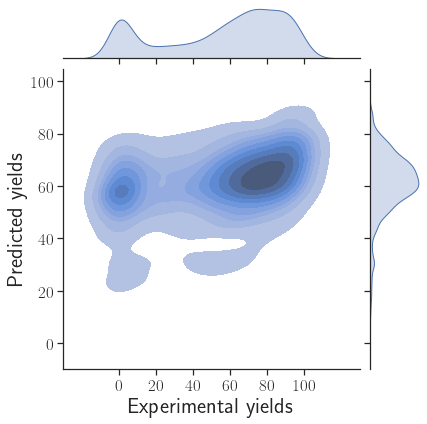

In [19]:
h = sns.jointplot("Yields", "Predicted Yields", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
h.ax_joint.set_xlim(x_low, x_up)
h.ax_joint.set_ylim(y_low, y_up)

plt.savefig('../images/substrate_split_rxnfp_descriptors_full.png', dpi=300, bbox_inches='tight')

# Descriptors Comparison

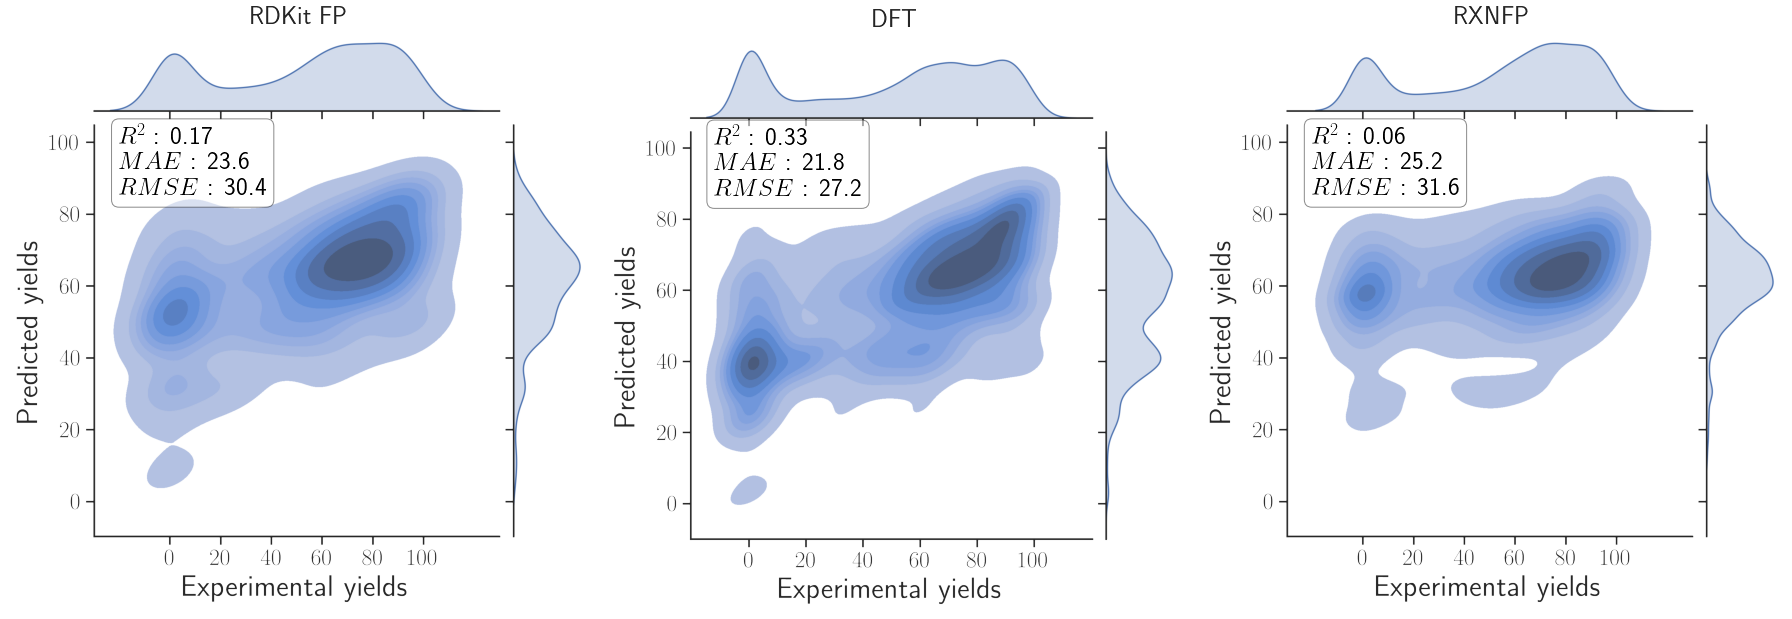

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]
fig_paths = ['../images/substrate_split_fp_descriptors_full.png', 
             '../images/substrate_split_dft_descriptors_full.png',
            '../images/substrate_split_rxnfp_descriptors_full.png']

r2 = [r2_score(df_1["Yields"], df_1["Predicted Yields"]), 
      r2_score(df_2["Yields"], df_2["Predicted Yields"]),
      r2_score(df_3["Yields"], df_3["Predicted Yields"])]
mae = [mean_absolute_error(df_1["Predicted Yields"], df_1["Yields"]), 
       mean_absolute_error(df_2["Predicted Yields"], df_2["Yields"]),
       mean_absolute_error(df_3["Predicted Yields"], df_3["Yields"])]

rmse = [mean_squared_error(df_1["Predicted Yields"], df_1["Yields"])**0.5, 
        mean_squared_error(df_2["Predicted Yields"], df_2["Yields"])**0.5,
        mean_squared_error(df_3["Predicted Yields"], df_3["Yields"])**0.5,]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    text = ax.text(340, 500, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14,  
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"), fontsize=25)
    
fig.tight_layout()    
plt.savefig('../images/substrate_split_all_descriptors_full.png', dpi=300, bbox_inches='tight')

# 3. DOI split

In [21]:
df_1 = pd.read_csv('../results/doi_split_fp_descriptors')
df_2 = pd.read_csv('../results/doi_split_dft_descriptors')
df_3 = pd.read_csv('../results/doi_split_rxnfp_descriptors')

## FP descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


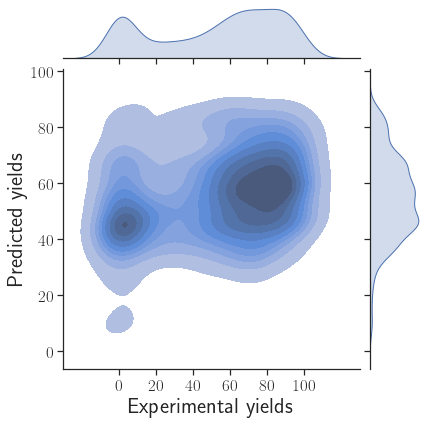

In [22]:
h = sns.jointplot("Yields", "Predicted Yields", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('../images/doi_split_fp_descriptors_full.png', dpi=300, bbox_inches='tight')

## DFT descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

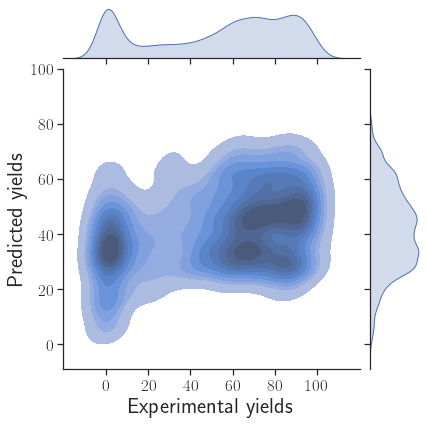

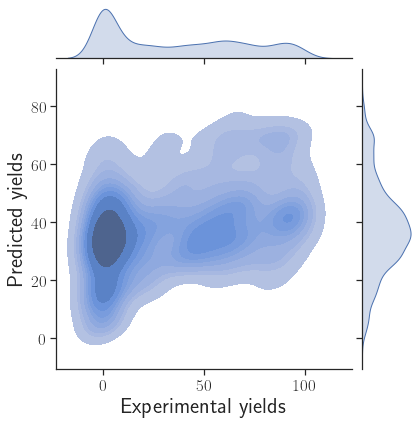

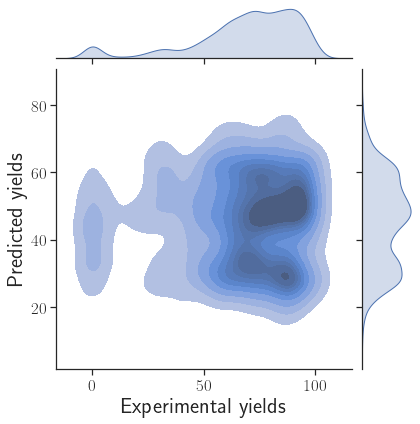

In [23]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Predicted Yields", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('../images/doi_split_dft_descriptors_full.png', dpi=300)
fig_paths.append('../images/doi_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))

indices = np.where(df_2['Origin'] == "Optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]
h=sns.jointplot("Yields", "Predicted Yields", df_2_optimisation, kind='kde', fill=True)
h.set_axis_labels("Experimental yields", "Predicted yields")
plt.savefig('../images/doi_split_dft_descriptors_optimisation.png', dpi=300)
fig_paths.append('../images/doi_split_dft_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))

indices = np.where(df_2['Origin'] == "Scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]
h=sns.jointplot("Yields", "Predicted Yields", df_2_scope, kind='kde', fill=True)
h.set_axis_labels("Experimental yields", "Predicted yields")
plt.savefig('../images/doi_split_dft_descriptors_scope.png', dpi=300)
fig_paths.append('../images/doi_split_dft_descriptors_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))

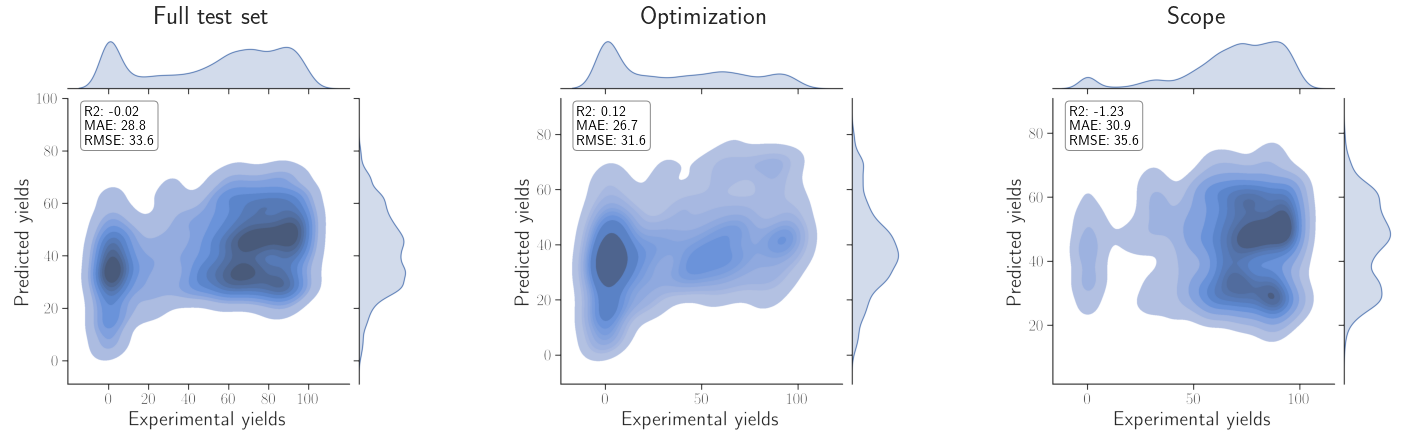

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "Optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]

indices = np.where(df_2['Origin'] == "Scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]

origins = ["Full test set", "Optimization", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    ax.text(340, 500, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

plt.savefig('../images/doi_split_dft_descriptors_all.png', dpi=300, bbox_inches='tight')

## RXNFP descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


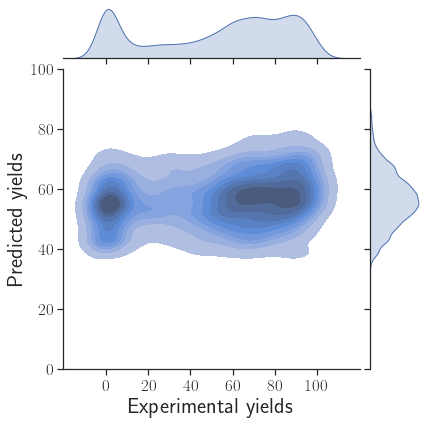

In [25]:
h = sns.jointplot("Yields", "Predicted Yields", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('../images/doi_split_rxnfp_descriptors_full.png', dpi=300, bbox_inches='tight')

In [26]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('../images/doi_split_fp_descriptors_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Predicted Yields"]))
r2.append(r2_score(df_1["Yields"], df_1["Predicted Yields"]))

fig_paths.append('../images/doi_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))

fig_paths.append('../images/doi_split_rxnfp_descriptors_full.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Predicted Yields"]))
r2.append(r2_score(df_3["Yields"], df_3["Predicted Yields"]))

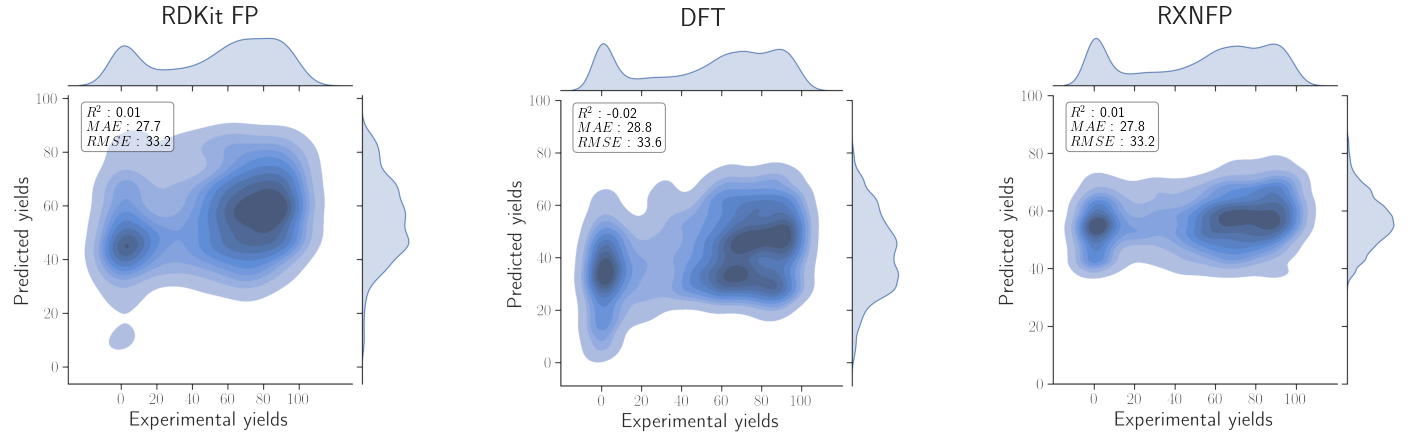

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    text = ax.text(340, 500, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))
    
plt.savefig('../images/doi_split_all_descriptors_full.png', dpi=300, bbox_inches='tight')

In [28]:
# DOI breakdown for DFT descriptors 
origins, R2_scores, MAE_scores, RMSE_scores = get_metrics(df_2)
results = pd.DataFrame(list(zip(R2_scores, MAE_scores, RMSE_scores)),
               columns =["r2", "MAE", "RMSE"],
                 index = origins)
string = results.to_latex()
string

'\\begin{tabular}{lrrr}\n\\toprule\n{} &     r2 &    MAE &   RMSE \\\\\n\\midrule\nThèse                                         &  -0.12 &  39.84 &  43.24 \\\\\nhttps://doi.org/10.1002/adsc.201600590        &  -1.01 &  39.77 &  42.69 \\\\\nhttps://doi.org/10.1002/anie.200453765        &   0.11 &  18.53 &  22.81 \\\\\nhttps://doi.org/10.1002/anie.200907287        &  -1.92 &  46.93 &  49.68 \\\\\nhttps://doi.org/10.1002/anie.201403823        &  -0.01 &  25.89 &  30.21 \\\\\nhttps://doi.org/10.1002/chem.201003731        &  -0.72 &  32.08 &  34.92 \\\\\nhttps://doi.org/10.1002/chem.201103784        &  -0.39 &  23.18 &  26.19 \\\\\nhttps://doi.org/10.1002/chem.201603436        &  -3.08 &  41.98 &  47.59 \\\\\nhttps://doi.org/10.1002/ejic.201900692        &  -0.88 &  30.50 &  33.93 \\\\\nhttps://doi.org/10.1021/acs.joc.6b01627       &  -0.10 &  30.16 &  32.77 \\\\\nhttps://doi.org/10.1021/acs.organomet.9b00543 &   0.03 &  17.40 &  21.33 \\\\\nhttps://doi.org/10.1021/acs.orglett.6b02656   & 

In [29]:
print(np.mean(R2_scores), np.std(R2_scores))
print(np.mean(MAE_scores), np.std(MAE_scores))
print(np.mean(RMSE_scores), np.std(RMSE_scores))

-0.9046153846153847 2.4239973831688575
29.975384615384613 8.455165117238298
33.80153846153846 8.186893696779435


# 4. Coupling Partner

In [30]:
df_1 = pd.read_csv('../results/mechanisms_split_fp_descriptors')
df_2 = pd.read_csv('../results/mechanisms_split_dft_descriptors')
df_3 = pd.read_csv('../results/mechanisms_split_rxnfp_descriptors')

## FP descriptors

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


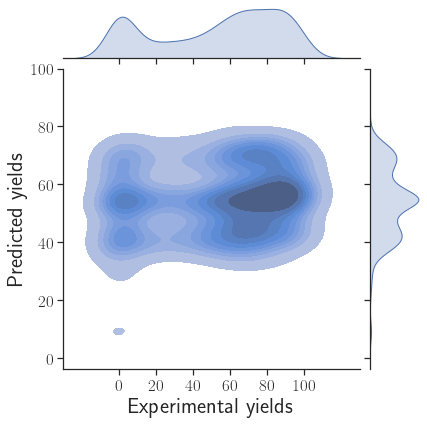

In [31]:
h = sns.jointplot("Yields", "Predicted Yields", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('../images/mechanism_split_fp_descriptors_full.png', dpi=300, bbox_inches='tight')

## DFT descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

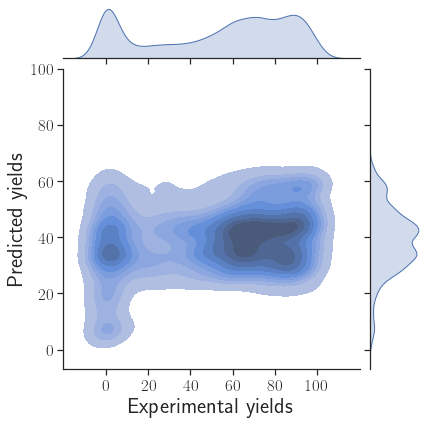

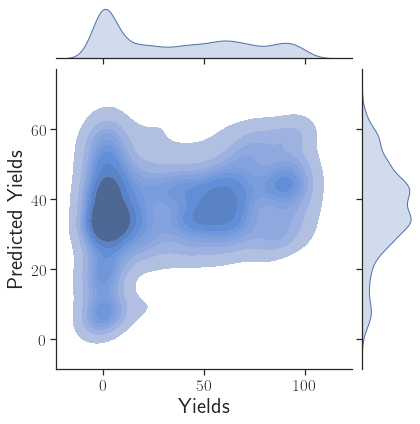

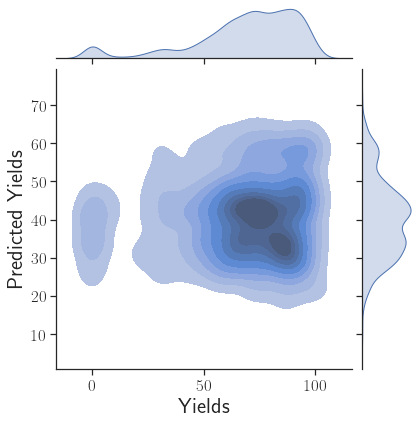

In [32]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Predicted Yields", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('../images/mechanism_split_dft_descriptors_full.png', dpi=300)
fig_paths.append('../images/mechanism_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))


indices = np.where(df_2['Origin'] == "Optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]
sns.jointplot("Yields", "Predicted Yields", df_2_optimisation, kind='kde', fill=True)
plt.savefig('../images/mechanism_split_dft_descriptors_optimisation.png', dpi=300)
fig_paths.append('../images/mechanism_split_dft_descriptors_optimisation.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))

indices = np.where(df_2['Origin'] == "Scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]
sns.jointplot("Yields", "Predicted Yields", df_2_scope, kind='kde', fill=True)
plt.savefig('../images/mechanism_split_dft_descriptors_scope.png', dpi=300)
fig_paths.append('../images/mechanism_split_dft_descriptors_scope.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))

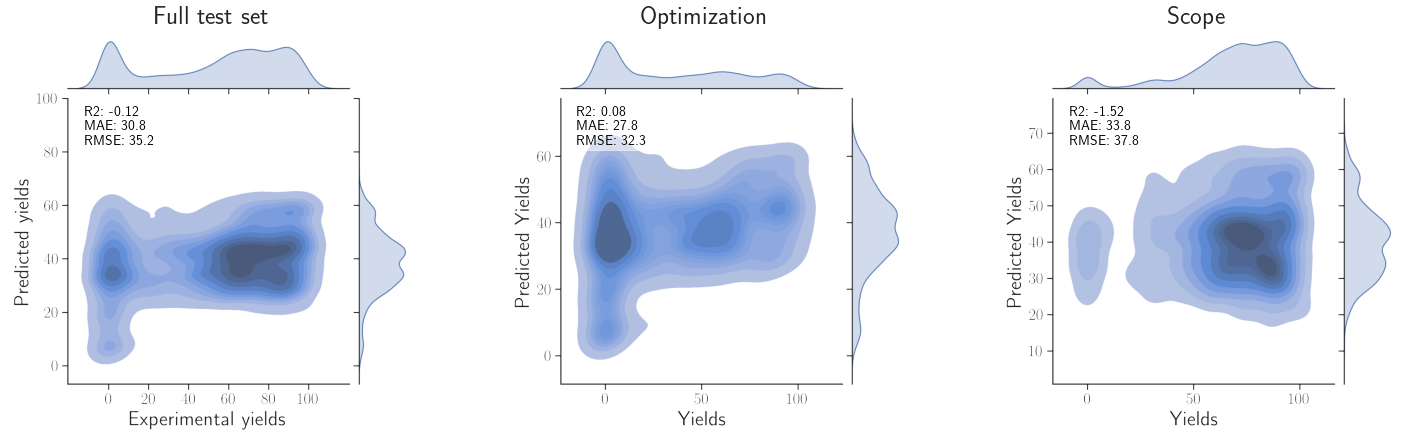

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]

origins = ["Full test set", "Optimization", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    #ax.text(75, 100, r'Pearsons R2: 0.5', {'color': 'k', 'fontsize': 20})
    ax.text(340, 500, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


## RXNFP descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


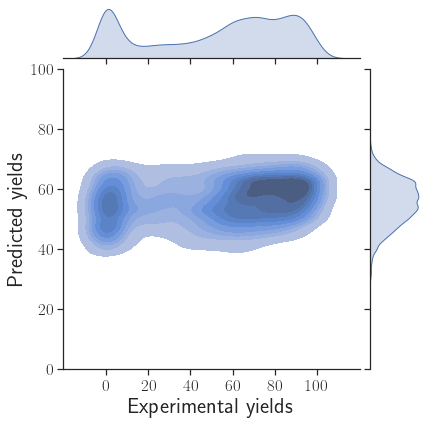

In [34]:
h = sns.jointplot("Yields", "Predicted Yields", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('../images/mechanism_split_rxnfp_descriptors_full.png', dpi=300, bbox_inches='tight')

In [35]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('../images/mechanism_split_fp_descriptors_full.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Predicted Yields"]))
r2.append(r2_score(df_1["Yields"], df_1["Predicted Yields"]))


fig_paths.append('../images/mechanism_split_dft_descriptors_full.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))

fig_paths.append('../images/mechanism_split_rxnfp_descriptors_full.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Predicted Yields"]))
r2.append(r2_score(df_3["Yields"], df_3["Predicted Yields"]))

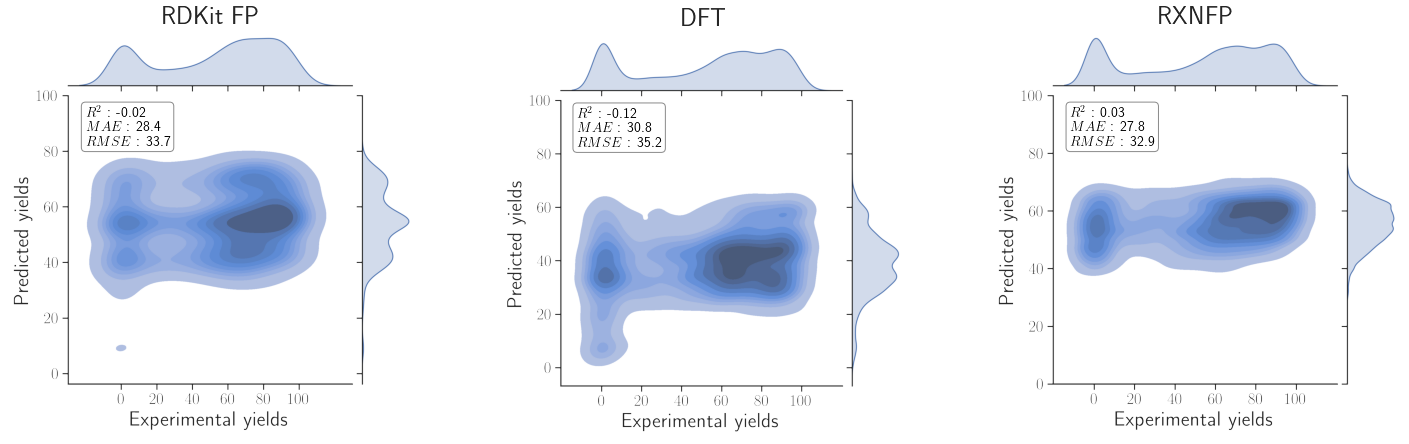

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i])
    ax.set_axis_off()
    text = ax.text(340, 500, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))
    
plt.savefig('../images/mechanism_split_all_descriptors_full.png', dpi=300, bbox_inches='tight')

In [37]:
# Coupling partner breakdown for DFT descriptors 
origins, R2_scores, MAE_scores, RMSE_scores = get_metrics(df_2)
results = pd.DataFrame(list(zip(R2_scores, MAE_scores, RMSE_scores)),
               columns =["r2", "MAE", "RMSE"],
                 index = origins)
string = results.to_latex()
string

'\\begin{tabular}{lrrr}\n\\toprule\n{} &    r2 &    MAE &   RMSE \\\\\n\\midrule\nAl   & -0.62 &  36.80 &  39.56 \\\\\nB    &  0.04 &  29.35 &  34.07 \\\\\nC-H  & -0.06 &  26.93 &  30.57 \\\\\nCO2  &  0.36 &  21.11 &  23.98 \\\\\nLi   & -4.03 &  49.76 &  52.41 \\\\\nNCO  &  0.11 &  19.15 &  23.64 \\\\\nNH   & -2.02 &  47.65 &  50.52 \\\\\nRMgX & -0.71 &  34.74 &  38.43 \\\\\nSi   & -0.94 &  39.05 &  41.92 \\\\\nZn   & -1.43 &  30.85 &  33.59 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [38]:
print(np.mean(R2_scores), np.std(R2_scores))
print(np.mean(MAE_scores), np.std(MAE_scores))
print(np.mean(RMSE_scores), np.std(RMSE_scores))

-0.93 1.25044791974716
33.539 9.667830625326447
36.86900000000001 9.286870786222881


# 5. Training set size influence 

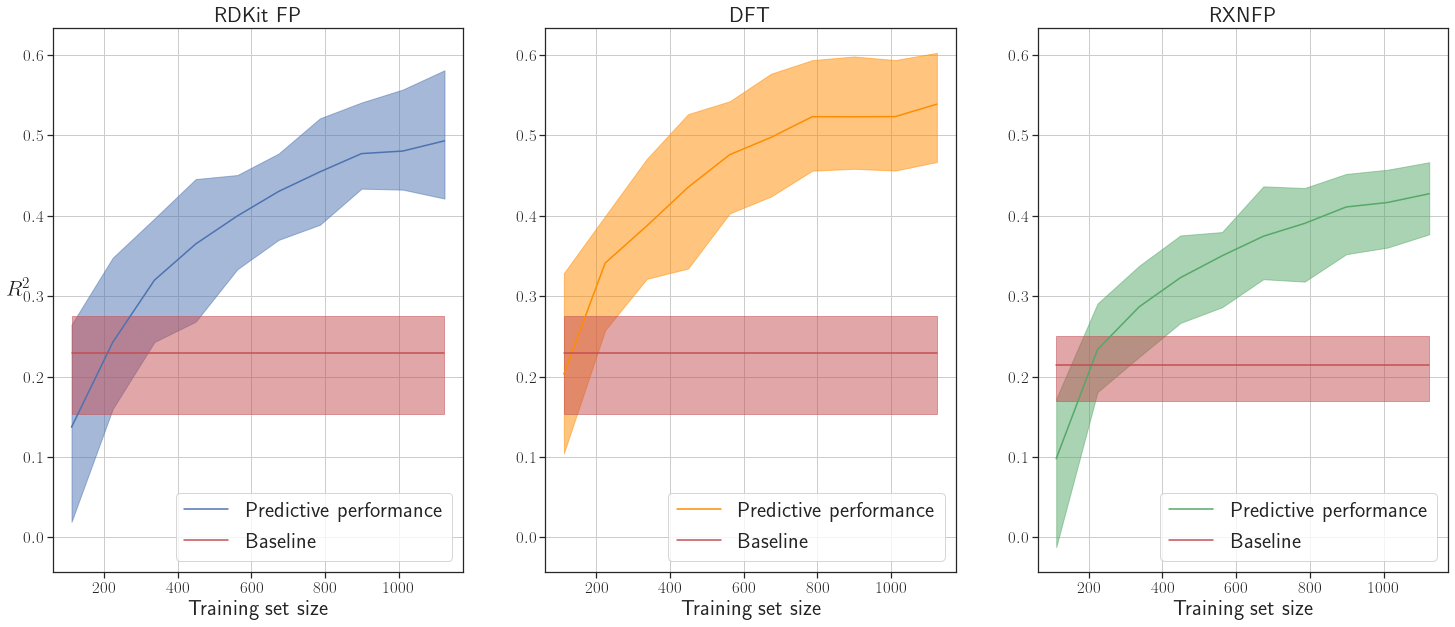

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 10), sharey=True)
df_1 = pd.read_csv('../results/training_size_influence_fp_descriptors')
df_2 = pd.read_csv('../results/training_size_influence_dft_descriptors')
df_3 = pd.read_csv('../results/training_size_influence_rxnfp_descriptors')
dfs = [df_1, df_2, df_3]
origins = ["RDKit FP", "DFT", "RXNFP",]
colors = ['b', 'darkorange', 'g']
for i, origin in enumerate(origins):
    ax = axes[i]
    df = dfs[i]
    sizes = df["Sizes"]
    metric_mean = df["Metric mean"]
    metric_lower = df["Metric lower"]
    metric_upper = df["Metric upper"]
    baseline_mean = df["Baseline mean"]
    baseline_lower = df["Baseline lower"]
    baseline_upper = df["Baseline upper"]
    ax.set_title(origins[i], fontsize=22)
    ax.plot(sizes, metric_mean, color= colors[i], label='Predictive performance')
    ax.fill_between(sizes, metric_lower, metric_upper, color = colors[i], alpha=0.5)    
    ax.plot(sizes, baseline_mean, c='r', label='Baseline')
    ax.fill_between(sizes, baseline_lower, baseline_upper, color='r', alpha=0.5)
    ax.yaxis.set_tick_params(labelbottom=True)
    ax.legend(fontsize=22, loc=4)
    ax.set_xlabel("Training set size")
    if i==0:
        ax.set_ylabel("$R^2$", rotation=0)
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.grid(True)
    
plt.savefig('../images/training_set_size_all_descriptors.png', dpi=300, bbox_inches='tight')

# 6. Restricted chemical space: Suzuki

In [40]:
df_1 = pd.read_csv('../results/random_split_fp_descriptors_test_size_0.2_mechanism_suzuki')
df_2 = pd.read_csv('../results/random_split_dft_descriptors_test_size_0.2_mechanism_suzuki')
df_3 = pd.read_csv('../results/random_split_rxnfp_descriptors_test_size_0.2_mechanism_suzuki')

## FP descriptors

In [41]:
r2 = r2_score(df_1["Yields"], df_1["Predicted Yields"])
mae = mean_absolute_error(df_1["Yields"], df_1["Predicted Yields"])
rmse = mean_squared_error(df_1["Yields"], df_1["Predicted Yields"])

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


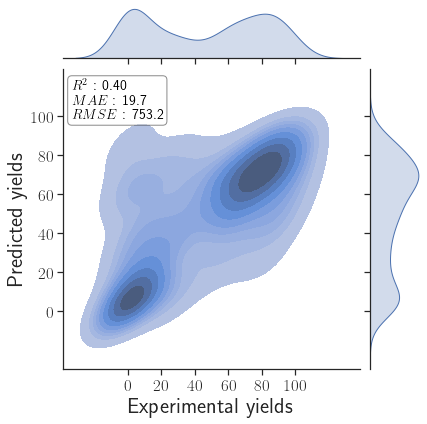

In [42]:
h = sns.jointplot("Yields", "Predicted Yields", df_1, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.text(-0.097, 99, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2, mae, rmse), 
         color='black', size=14, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))
plt.savefig('../images/random_split_fp_descriptors_full_mechanism_suzuki.svg', dpi=300, bbox_inches='tight')

## DFT descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

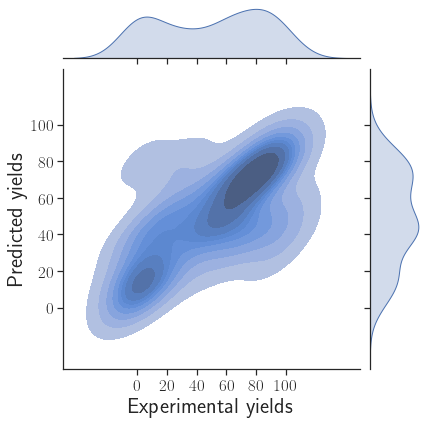

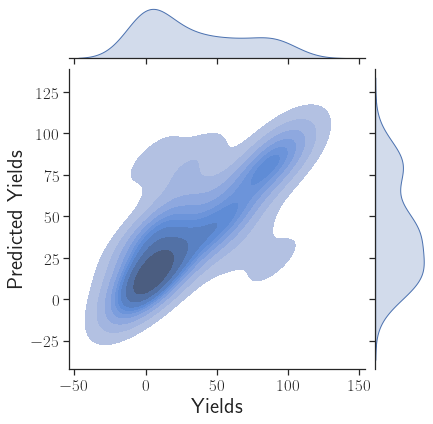

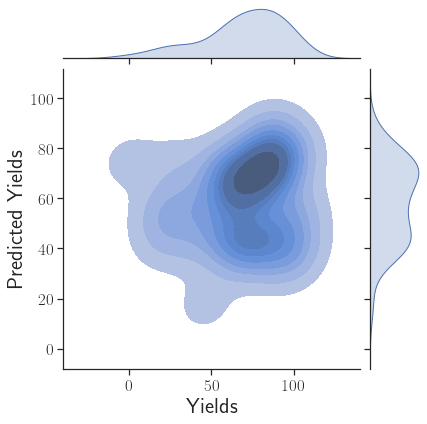

In [43]:
fig_paths = []
rmse = []
mae = []
r2 = []

h = sns.jointplot("Yields", "Predicted Yields", df_2, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('../images/random_split_dft_descriptors_full_mechanism_suzuki.png', dpi=300)
fig_paths.append('../images/random_split_dft_descriptors_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))


indices = np.where(df_2['Origin'] == "Optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]
sns.jointplot("Yields", "Predicted Yields", df_2_optimisation, kind='kde', fill=True)
plt.savefig('../images/random_split_dft_descriptors_optimisation_mechanism_suzuki.png', dpi=300)
fig_paths.append('../images/random_split_dft_descriptors_optimisation_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))
r2.append(r2_score(df_2_optimisation["Yields"], df_2_optimisation["Predicted Yields"]))

indices = np.where(df_2['Origin'] == "Scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]
sns.jointplot("Yields", "Predicted Yields", df_2_scope, kind='kde', fill=True)
plt.savefig('../images/random_split_dft_descriptors_scope_mechanism_suzuki.png', dpi=300)
fig_paths.append('../images/random_split_dft_descriptors_scope_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))
r2.append(r2_score(df_2_scope["Yields"], df_2_scope["Predicted Yields"]))

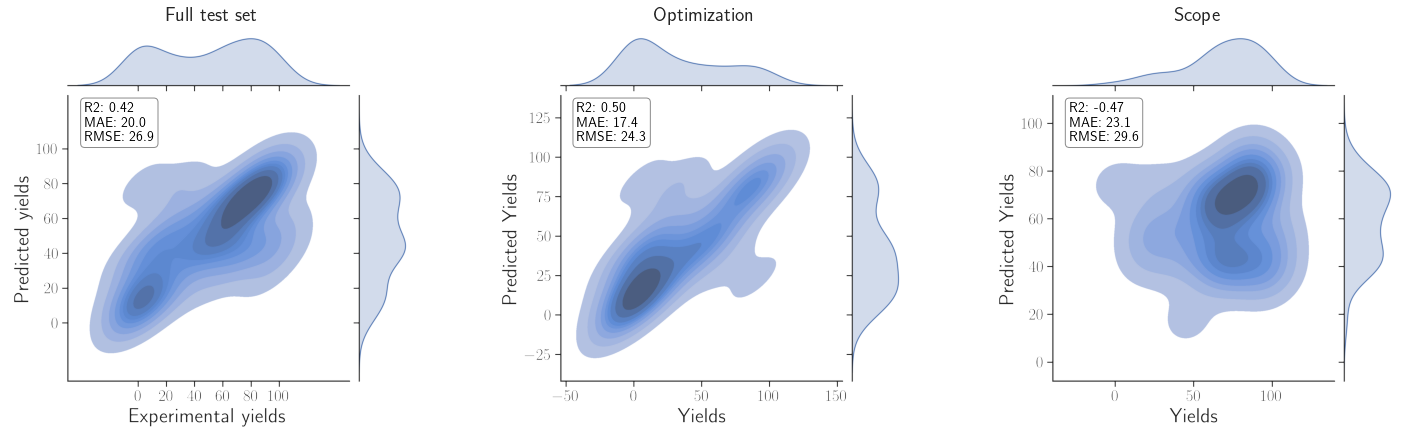

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

indices = np.where(df_2['Origin'] == "optimisation")
df_2_optimisation = df_2[["Yields", "Predicted Yields"]].iloc[indices]

indices = np.where(df_2['Origin'] == "scope")
df_2_scope = df_2[["Yields", "Predicted Yields"]].iloc[indices]

origins = ["Full test set", "Optimization", "Scope",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    ax.text(340, 500, ' R2: {:.2f} \n MAE: {:.1f} \n RMSE: {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec='k'))

fig.savefig("../images/random_split_dft_descriptors_scope_mechanism_suzuki.svg", dpi=300, bbox_inches="tight")

## RXNFP descriptors 

/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


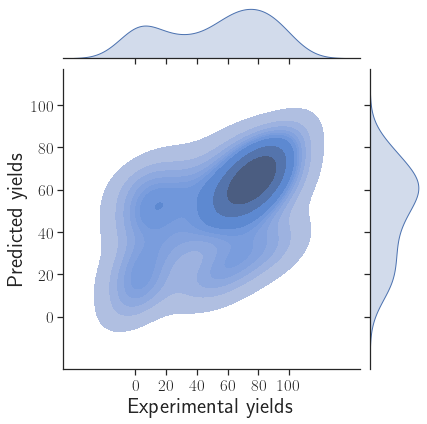

In [45]:
h = sns.jointplot("Yields", "Predicted Yields", df_3, kind='kde', fill=True)
h.set_axis_labels('Experimental yields', 'Predicted yields')
h.ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
h.ax_joint.set_yticks([0, 20, 40, 60, 80, 100])
h.ax_marg_x.set_facecolor("white")
h.ax_marg_y.set_facecolor("white")
plt.savefig('../images/random_split_rxnfp_descriptors_full_mechanism_suzuki.png', dpi=300, bbox_inches='tight')

In [46]:
fig_paths = []
rmse = []
mae = []
r2 = []

fig_paths.append('../images/random_split_fp_descriptors_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_1["Yields"], df_1["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_1["Yields"], df_1["Predicted Yields"]))
r2.append(r2_score(df_1["Yields"], df_1["Predicted Yields"]))

fig_paths.append('../images/random_split_dft_descriptors_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_2["Yields"], df_2["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_2["Yields"], df_2["Predicted Yields"]))
r2.append(r2_score(df_2["Yields"], df_2["Predicted Yields"]))

fig_paths.append('../images/random_split_rxnfp_descriptors_full_mechanism_suzuki.png')
rmse.append(mean_squared_error(df_3["Yields"],df_3["Predicted Yields"])**0.5)
mae.append(mean_absolute_error(df_3["Yields"], df_3["Predicted Yields"]))
r2.append(r2_score(df_3["Yields"], df_3["Predicted Yields"]))

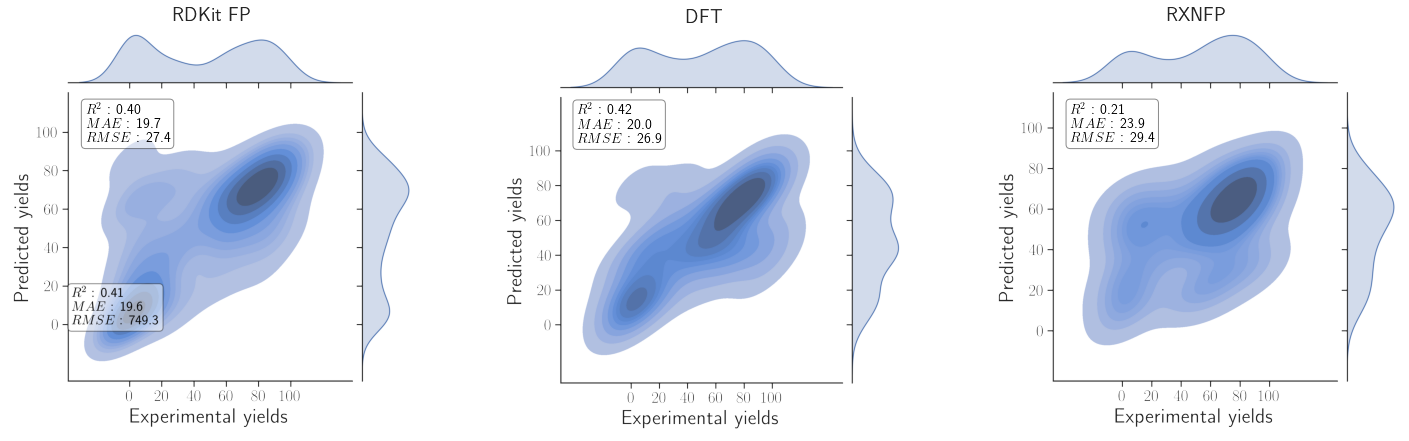

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 25), sharey=True)

origins = ["RDKit FP", "DFT", "RXNFP",]

for i, origin in enumerate(origins):
    ax = axes[i]
    image_file = fig_paths[i]
    image = plt.imread(image_file)
    ax.imshow(image)
    ax.set_title(origins[i], fontsize=20)
    ax.set_axis_off()
    text = ax.text(340, 500, ' $R^2$      : {:.2f} \n $MAE$   : {:.1f} \n $RMSE$ : {:.1f}'.format(r2[i], mae[i], rmse[i]), color='black', size=14, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, ec="k"))

plt.savefig('../images/meca_restricted_all_descriptors_full.png', dpi=300, bbox_inches='tight')